# Fuzzy Systems
# Washing Machine Fuzzy Controller
## Problem Descriptions
Design a fuzzy logic system for a washing machine controller that utilizes three linguistic variables, including two input variables and one output variable.

### Linguistic Variables
We have 3 liguititc variabel(the first 2 are inputs and the last is an output):

    *  Degree of Dirtiness(60%): SD(small), MD(medium), LD(large)
    *  Size of Load of Clothes(70%): SL(small), ML(medium), LL(large)
    *  Washing Time: VS(very short), S(short), M(medium),L(long), VL(very long)

### Mebership Function
    *  Dirtiness(range 0 - 100) :    
        *  A1 - SD{1/0, 0.5/20, 0.1/40, 0/50, 0/80, 0/100}.
        *  A2 - MD{0/0, 0.3/20, 0.8/40, 1/50, 0.3/80, 0/100}.
        *  A3 - LD{0/0, 0/20, 0/50, 0.1/60, 0.5/80, 1/100}.
    *  Load(range 0 - 100) :    
        *  B1 - SL{1/0, 0.5/20, 0.1/40, 0/50, 0/80, 0/100}.
        *  B2 - ML{0/0, 0.3/20, 0.8/40, 1/50, 0.3/80, 0/100}.
        *  B3 - LL{0/0, 0/20, 0/50, 0.1/60, 0.5/80, 1/100}.
    *  Washing Time(range 0 - 60) percent :    
        *  C1 - VS{1/0, 0/15, 0/30, 0/40, 0/45, 0/60}.
        *  C2 - S{0/0, 1/15, 0/30, 0/40, 0/45, 0/60}.
        *  C3 - M{0/0, 0/15, 0/10, 1/30, 0/45, 0/60}.
        *  C4 - L{0/0, 0/10, 0/20, 0/30, 1/45, 0/60}
        *  C5 - VL{0/0, 0/10, 0/20, 0/30, 0/45, 1/60}


### Rules (Model Assessment)    
    Rule 1:
        *  IF      dirtiness is SD - x is A1
        *  AND     load is SL - y is B1
        *  THEN    washing time is VS - z is C1
    Rule 2:    
        *  IF      dirtiness is SD - x is A1
        *  AND     load is ML - y is B2
        *  THEN    washing time is M - z is C3
    Rule 3:    
        *  IF      dirtiness is SD - x is A1
        *  AND     load is LL - y is B3
        *  THEN    washing time is L - z is C4
    Rule 4:
        *  IF      dirtiness is MD - x is A2
        *  AND     load is SL - y is B1
        *  THEN    washing time is S - z is C2
    Rule 5:    
        *  IF      dirtiness is MD x is A2
        *  AND     load is ML - y is B2
        *  THEN    washing time is M - z is C3
    Rule 6:    
        *  IF      dirtiness is MD - x is A2
        *  AND     load is LL - y is B3
        *  THEN    washing time is L - z is C4
    Rule 7:
        *  IF      dirtiness is LD - x is A3
        *  AND     load is SL - y is B1
        *  THEN    washing time is M - z is C3
    Rule 8:    
        *  IF      dirtiness is LD - x is A3
        *  AND     load is ML - y is B2
        *  THEN    washing time is L - z is C4
    Rule 9:    
        *  IF      dirtiness is LD - x is A3
        *  AND     load is LL - y is B3
        *  THEN    washing time is VL - z is C5
## Implementation and Results
### Implementation Strategy
Using the Mamdani inference system we will:

*  Fuzzyfication of input Vaiables.
*  Rule evaluation.
*  Aggregation of rule outputs.
*  Defuzzyfication.

In [1]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.8 MB/s eta 0:00:00


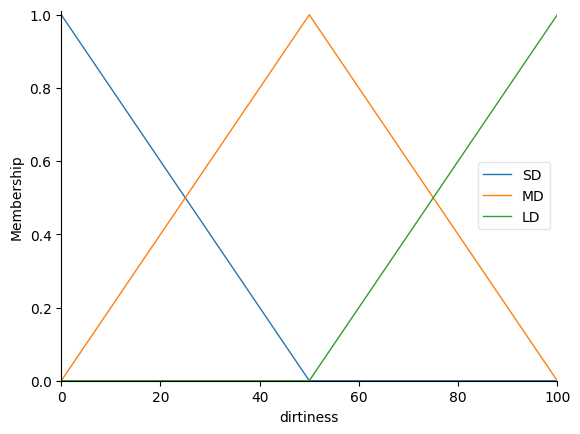

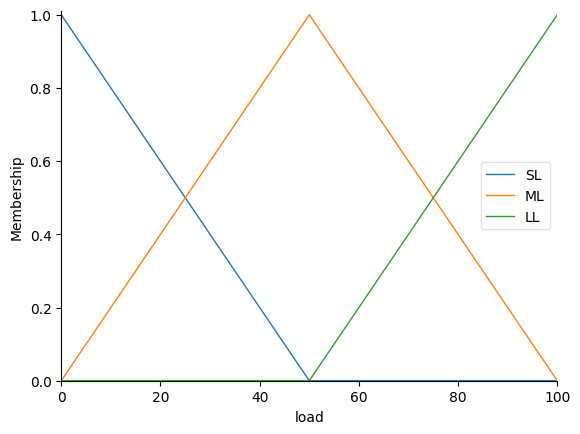

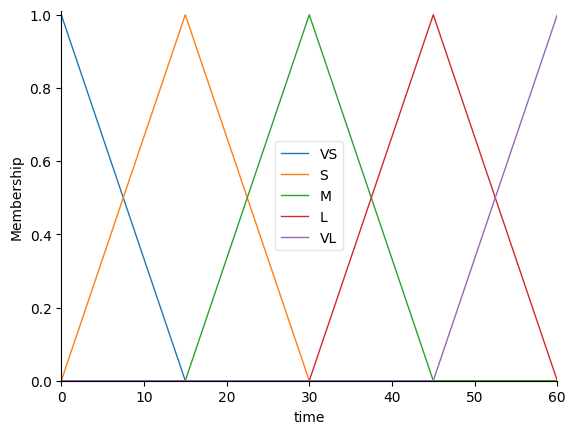

In [2]:
# Linguistic variables for antecedents/consequent
dirtiness = ctrl.Antecedent(np.arange(0, 101, 1), 'dirtiness')
load = ctrl.Antecedent(np.arange(0, 101, 1), 'load')
time = ctrl.Consequent(np.arange(0, 61, 1), 'time')

# membership functions for each linguistic values
dirtiness.automf(3, names=['SD', 'MD', 'LD'])
load.automf(3, names=['SL', 'ML', 'LL'])
time.automf(5, names=['VS', 'S', 'M', 'L', 'VL'])

dirtiness.view()
load.view()
time.view()

In [3]:
# Define the rules
rule1 = ctrl.Rule(dirtiness['SD'] & load['SL'], time['VS'])
rule2 = ctrl.Rule(dirtiness['SD'] & load['ML'], time['M'])
rule3 = ctrl.Rule(dirtiness['SD'] & load['LL'], time['L'])
rule4 = ctrl.Rule(dirtiness['MD'] & load['SL'], time['S'])
rule5 = ctrl.Rule(dirtiness['MD'] & load['ML'], time['M'])
rule6 = ctrl.Rule(dirtiness['MD'] & load['LL'], time['L'])
rule7 = ctrl.Rule(dirtiness['LD'] & load['SL'], time['M'])
rule8 = ctrl.Rule(dirtiness['LD'] & load['ML'], time['L'])
rule9 = ctrl.Rule(dirtiness['LD'] & load['LL'], time['VL'])

# Create the control system and its simulation
ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
ctrl_sim = ctrl.ControlSystemSimulation(ctrl_sys)

Washing time: 36.650793650793666


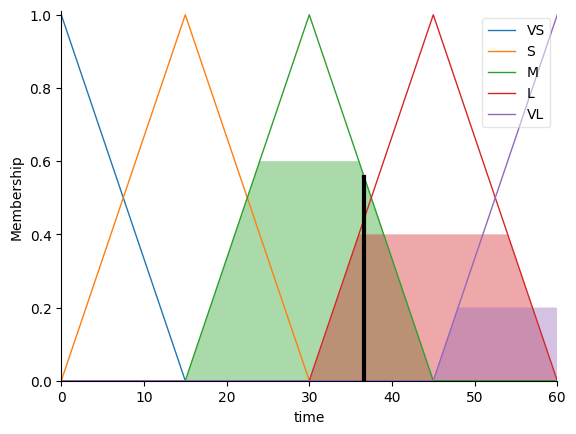

In [5]:
# Test 1
# Pass inputs to the ControlSystem
ctrl_sim.inputs({'dirtiness': 60, 'load': 70})

# Crunch the numbers
ctrl_sim.compute()
print("Washing time:", ctrl_sim.output['time'])
time.view(sim=ctrl_sim)


Washing time: 20.121212121212118


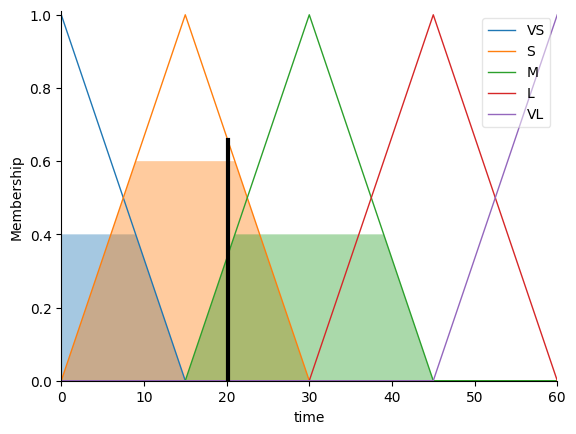

In [6]:
# Test 2
# Pass inputs to the ControlSystem
ctrl_sim.inputs({'dirtiness': 30, 'load': 20})

# Crunch the numbers
ctrl_sim.compute()
print("Washing time:", ctrl_sim.output['time'])
time.view(sim=ctrl_sim)
